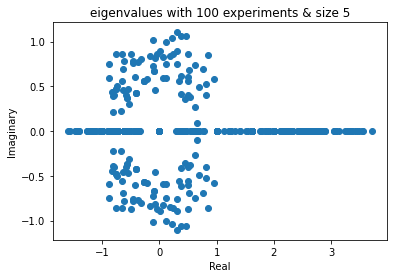

In [59]:
import numpy as np
from scipy.stats import bernoulli as ber
from numpy.linalg import eig
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, solve, nsolve, roots, solveset, nroots
from sympy import re, im

#defining a function to create bernoulli matrix with dimension 'size', and probability 'p'
def berMat(size,p):
    n=size**2 #total numbers in the matrix
    M=ber.rvs(p,size=n) #creating size*size Bernoulli samples
    return M.reshape(size,size) #reshaping samples into matrix




#defining a function to calculate determinant (expanding row1)
def determinant(M):
    size=len(M) #size of matrix
    if size>2:
        s=0 #final determinant value
        firstRow=M[0] #first row of matrix
        for i in range(size): #for all elements of first row
            newM=np.delete(M,0,0)
            newM=np.delete(newM,i,1) #removing row 0 and col i from M
            s=s+(-1)**i*firstRow[i]*determinant(newM) #determinant formula
        return s
    else: #if size of matrix equals2, the determinant equals ad-bc
        a,b,c,d=M[0,0],M[0,1],M[1,0],M[1,1]
        return a*d-b*c



#defining a function to compute eigenvalues of given matrix M
def eigenVal(M):
    I_M=np.identity(len(M)) #identity matrix
    M=sp.Matrix(M) #converting matrix into sympy
    landa = symbols('l') #defining parameter landa
    I_M=sp.Matrix(I_M) #converting identity matrix into sympy
    M_landa=M-landa*I_M
    deter=determinant(np.array(M_landa)) #det(M-landa*I)
    ans=[x.evalf(5) for x in solve(deter)] #det(M-landa*I)=0 (solveset(deter,landa) is faster)
    return ans

                    

                    
total=100 #total number of experiments
p=0.5 #probability for bernoulli
size=5 #size of each matrix
R=[] #real parts vector
I=[] #imaginary parts vector

for i in range(total):
    A=berMat(size,p) #creating matrix
    val=eigenVal(A) #computing eigenvalues
    r=np.array([re(x) for x in val]) #real part of val
    i=np.array([im(x) for x in val]) #imaginary part of val
    R=np.concatenate((R,r),axis=None) #adding new values to R
    I=np.concatenate((I,i),axis=None) #adding new values to I

#plotting eigenvalues
plt.scatter(R, I)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('eigenvalues with '+str(total)+' experiments & size '+str(size))
plt.show()

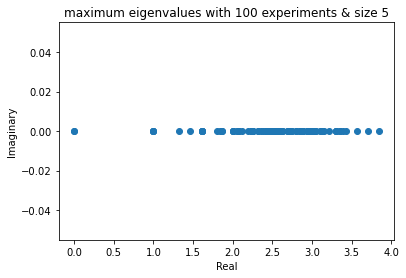

In [58]:
import numpy as np
from scipy.stats import bernoulli as ber
from numpy.linalg import eig
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, solve, nsolve, roots, nroots
from sympy import re, im
import cmath

#defining a function to create bernoulli matrix with dimension 'size', and probability 'p'
def berMat(size,p):
    n=size**2 #total numbers in the matrix
    M=ber.rvs(p,size=n) #creating size*size Bernoulli samples
    return M.reshape(size,size) #reshaping samples into matrix




#defining a function to calculate determinant (expanding row1)
def determinant(M):
    size=len(M) #size of matrix
    if size>2:
        s=0 #final determinant value
        firstRow=M[0] #first row of matrix
        for i in range(size): #for all elements of first row
            newM=np.delete(M,0,0)
            newM=np.delete(newM,i,1) #removing row 0 and col i from M
            s=s+(-1)**i*firstRow[i]*determinant(newM) #determinant formula
        return s
    else: #if size of matrix equals2, the determinant equals ad-bc
        a,b,c,d=M[0,0],M[0,1],M[1,0],M[1,1]
        return a*d-b*c


#defining a function to compute eigenvalues of given matrix M
def eigenVal(M):
    I_M=np.identity(len(M)) #identity matrix
    M=sp.Matrix(M) #converting matrix into sympy
    landa = symbols('l') #defining parameter landa
    I_M=sp.Matrix(I_M) #converting identity matrix into sympy
    M_landa=M-landa*I_M
    deter=determinant(np.array(M_landa)) #det(M-landa*I), using determinant(M_landa) doesn't work
    ans=[x.evalf(5) for x in solve(deter)] #det(M-landa*I)=0 (nroots(deter,n=4,maxsteps=1000) is faster)
    return ans


                    
total=100 #total number of experiments
p=0.5 #probability for bernoulli
size=5 #size of each matrix
v=[] #maximum absolute values vector
for i in range(total):
    A=berMat(size,p) #creating matrix
    val=eigenVal(A) #computing eigenvalues
    absol=np.absolute(val) #absolute value of eigenvalues
    maxAbs=np.amax(absol) #maximum absolute value
    ind=(np.where(absol==maxAbs)[0])[0] #index of maximum absolute value
    val=np.absolute(val[ind]) #keep the maximum absolute value
    v=np.concatenate((v,val),axis=None) #add the maximum absolute value to the main vector

#plotting eigenvalues
plt.scatter(v, np.zeros(len(v)))
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('maximum eigenvalues with '+str(total)+' experiments & size '+str(size))
plt.show()
